<a href="https://colab.research.google.com/github/pablolopezq/Notebooks/blob/master/DynamicProgramming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sudoku

In [400]:
grid = [
          [9,1,7,2,5,4,0,0,0],
          [4,0,2,0,8,0,0,0,0],
          [6,5,0,0,0,3,4,0,0],
          [0,0,3,0,9,0,2,5,6],
          [5,0,0,7,0,0,3,0,9],
          [2,0,0,0,0,5,0,7,1],
          [0,2,0,5,3,0,7,6,0],
          [3,7,0,1,6,0,0,9,8],
          [0,0,0,0,0,0,0,3,0]
]

solution = [
          [9,1,7,2,5,4,6,8,3],
          [4,3,2,6,8,7,9,1,5],
          [6,5,8,9,1,3,4,2,7],
          [7,4,3,8,9,1,2,5,6],
          [5,8,1,7,2,6,3,4,9],
          [2,9,6,3,4,5,8,7,1],
          [1,2,9,5,3,8,7,6,4],
          [3,7,4,1,6,2,5,9,8],
          [8,6,5,4,7,9,1,3,2]
]

In [401]:
def empty():
  for i in range(9):
    for j in range(9):
      if grid[i][j] == 0:
        return (i,j)

In [402]:
def check_valid(pos, val):
  for y in range(9):
    if pos[1] != y and grid[pos[0]][y] == val:
      return False
  for x in range(9):
    if pos[0] != x and grid[x][pos[1]] == val:
      return False
  block_row = (pos[0]//3)*3
  block_col = (pos[1]//3)*3
  for i in range(block_row, block_row+3):
    for j in range(block_col, block_col+3):
      if grid[i][j] == val and pos != (i,j):
        return False
  return True

In [403]:
def printBoard():
  for i in range(9):
    if i in [3,6]:
      print('------+-------+------')
    for j in range(9):
      if j in [3,6] and j != 0:
        print('|', end='')
      if j == 8:
        print(grid[i][j])
      else:
        print(str(grid[i][j]) + " ", end='')

In [404]:
def solve():
  free = empty()
  if not free:
    return True
  for i in range(1,10):
    if check_valid(free, i):
      grid[free[0]][free[1]] = i;
      if solve():
        return True
        
  grid[free[0]][free[1]] = 0
  return False

In [405]:
def check_sol():
  if grid == solution:
    print('Solucion encontrada')
    printBoard()
  else:
    print('Solucion no encontrada')

In [406]:
if solve():
  check_sol()
else:
  print('failed')

Solucion encontrada
9 1 7 |2 5 4 |6 8 3
4 3 2 |6 8 7 |9 1 5
6 5 8 |9 1 3 |4 2 7
------+-------+------
7 4 3 |8 9 1 |2 5 6
5 8 1 |7 2 6 |3 4 9
2 9 6 |3 4 5 |8 7 1
------+-------+------
1 2 9 |5 3 8 |7 6 4
3 7 4 |1 6 2 |5 9 8
8 6 5 |4 7 9 |1 3 2


# Fibonacci sin Dynamic Programming

In [407]:
def fib_nodp(n):
  if n <= 1:
    return n
  else:
    return fib_nodp(n-1) + fib_nodp(n-2)

# Fibonacci con Dynamic Programming

In [408]:
arr = [0,1]
def fib_dp(n):
  if n < len(arr):
    return arr[n]
  else:
    t = fib_dp(n-1) + fib_dp(n-2)
    arr.append(t)
  return t

# Exec

55
55
0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 832040 1346269 2178309 3524578 5702887 
0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 832040 1346269 2178309 3524578 5702887 

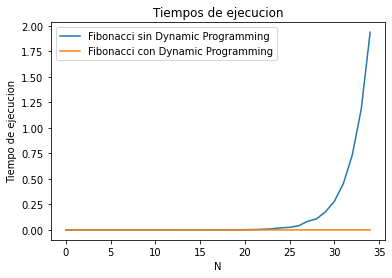

In [409]:
import matplotlib.pyplot as plt
import time

fib_nodp_dict = {0: 0}
fib_dp_dict = {0: 0}

print(fib_dp(10))
print(fib_dp(10))

for i in range(35):
  t0 = time.clock()
  n = fib_nodp(i)
  t1 = time.clock() - t0
  print(n, end=" ")
  fib_nodp_dict[i] = t1

print()

for j in range(35):
  t2 = time.clock()
  m = fib_dp(j)
  t3 = time.clock() - t2
  print(m, end=" ")
  fib_dp_dict[j] = t3

x = list(fib_nodp_dict.keys())
y = list(fib_nodp_dict.values())

x1 = list(fib_dp_dict.keys())
y1 = list(fib_dp_dict.values())

plt.xlabel("N") 
plt.ylabel("Tiempo de ejecucion") 
plt.plot(x,y, label = "Fibonacci sin Dynamic Programming")
plt.plot(x1,y1, label = "Fibonacci con Dynamic Programming")
plt.title("Tiempos de ejecucion")
plt.legend()
plt.show()